In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Reading data
data = pd.read_csv("data.csv")

In [ ]:
data.shape

(278238, 34)

In [ ]:
# Subsetting data related to mental health
data = data[data['Topic'] == "Mental Health"]

In [ ]:
data.shape

(22080, 34)

In [ ]:
# Finding irrelevant and inconsistent columns to drop.
columns_to_drop = ["LocationAbbr","DataSource","Subtopic","ShortQuestionText", "Data_Value_Symbol","Data_Value_Type",
                   "Lesser_Risk_Question", "Lesser_Risk_Data_Value", "Lesser_Risk_High_Confidence_Limit", "Lesser_Risk_Low_Confidence_Limit"]


In [ ]:
data = data.drop(columns_to_drop, axis=1)

In [ ]:
data.shape

(22080, 24)

In [ ]:
total_rows = data.shape[0]
total_rows

22080

In [ ]:
#  Finding total null values
nulls =  (data.isnull().sum()).sort_values(ascending = False)
nulls

Greater_Risk_Data_Value_Footnote_Symbol    22080
Greater_Risk_Data_Value_Footnote           22080
Lesser_Risk_Data_Value_Footnote_Symbol     22080
Lesser_Risk_Data_Value_Footnote            22080
LocationId                                 22080
GeoLocation                                22080
Description                                 4005
Greater_Risk_Data_Value                     1211
Greater_Risk_Low_Confidence_Limit           1211
Greater_Risk_High_Confidence_Limit          1211
Year                                           0
SubtopicID                                     0
StratID3                                       0
StratID2                                       0
StratID1                                       0
QuestionCode                                   0
Sample_Size                                    0
TopicID                                        0
Age                                            0
Sex                                            0
LocationDesc        

In [ ]:
# Removing columns with 100% of null values
data.dropna(axis=1, how="all", inplace=True)

In [ ]:
data.shape

(22080, 18)

In [ ]:
# Identifying columns containing a single distinct value.
columns_with_one_value = []
for col in data.columns:
  if len(pd.unique(data[col])) == 1:
    columns_with_one_value.append(col)
columns_with_one_value

['Topic', 'TopicID', 'SubtopicID']

In [ ]:
data = data.drop(columns_with_one_value, axis=1)

In [ ]:
data.shape

(22080, 15)

In [ ]:
data.columns

Index(['Year', 'LocationDesc', 'Greater_Risk_Question', 'Description',
       'Greater_Risk_Data_Value', 'Greater_Risk_Low_Confidence_Limit',
       'Greater_Risk_High_Confidence_Limit', 'Sample_Size', 'Sex', 'Age',
       'QuestionCode', 'StratID1', 'StratID2', 'StratID3',
       'StratificationType'],
      dtype='object')

In [ ]:
# Changing the index
new_index = pd.RangeIndex(1, data.shape[0]+1)
data.index = new_index
data.head()

,Year,LocationDesc,Greater_Risk_Question,Description,Greater_Risk_Data_Value,Greater_Risk_Low_Confidence_Limit,Greater_Risk_High_Confidence_Limit,Sample_Size,Sex,Age,QuestionCode,StratID1,StratID2,StratID3,StratificationType
1,2015,Seychelles,Did not have close friends,NaN,NaN,NaN,NaN,11,Male,17,G27,S8,A6,SH,African
2,2009,Maldives,Did not have close friends,NaN,12.2905,8.4942,17.4597,392,Male,15,G27,S8,A4,MV,South-East Asia
3,2009,Malawi (Urban),Did not have close friends,NaN,13.2630,8.4904,20.1283,172,Male,15,G27,S8,A4,MWB,African
4,2004,Guyana,Did not have close friends,NaN,11.3370,7.6105,16.5612,275,Total,13,G27,S1,A2,GY,Americas
5,2012,Argentina Chubut,Did not have close friends,NaN,3.2256,1.7633,5.8287,732,Female,Total,G27,S7,A1,AGD,Americas


In [ ]:
# Saving the dataframe as a csv file
data.to_csv('final_data.csv')

In [ ]:
data.columns

Index(['Year', 'LocationDesc', 'Greater_Risk_Question', 'Description',
       'Greater_Risk_Data_Value', 'Greater_Risk_Low_Confidence_Limit',
       'Greater_Risk_High_Confidence_Limit', 'Sample_Size', 'Sex', 'Age',
       'QuestionCode', 'StratID1', 'StratID2', 'StratID3',
       'StratificationType'],
      dtype='object')

In [ ]:
data = data.drop(["Description","Greater_Risk_Data_Value","QuestionCode",'StratID1', 'StratID2', 'StratID3'],axis=1)
data.head(2)

,Year,LocationDesc,Greater_Risk_Question,Greater_Risk_Low_Confidence_Limit,Greater_Risk_High_Confidence_Limit,Sample_Size,Sex,Age,StratificationType
1,2015,Seychelles,Did not have close friends,NaN,NaN,11,Male,17,African
2,2009,Maldives,Did not have close friends,8.4942,17.4597,392,Male,15,South-East Asia


In [ ]:
for i in range (len(data["Age"])):
  age_str = data["Age"].iloc[i]
  if age_str == "13-15":
    data["Age"].iloc[i] = 14
  elif age_str == "13-17":
    data["Age"].iloc[i] = 16
  elif age_str == "Total":
    data["Age"].iloc[i] = 18
  else:
    data["Age"].iloc[i] = int(age_str)
data.head(10)

<ipython-input-55-8162b32a4546>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Age"].iloc[i] = int(age_str)
<ipython-input-55-8162b32a4546>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Age"].iloc[i] = 18
<ipython-input-55-8162b32a4546>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Age"].iloc[i] = 14
<ipython-input-55-8162b32a4546>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

,Year,LocationDesc,Greater_Risk_Question,Greater_Risk_Low_Confidence_Limit,Greater_Risk_High_Confidence_Limit,Sample_Size,Sex,Age,StratificationType
1,2015,Seychelles,Did not have close friends,NaN,NaN,11,Male,17,African
2,2009,Maldives,Did not have close friends,8.4942,17.4597,392,Male,15,South-East Asia
3,2009,Malawi (Urban),Did not have close friends,8.4904,20.1283,172,Male,15,African
4,2004,Guyana,Did not have close friends,7.6105,16.5612,275,Total,13,Americas
5,2012,Argentina Chubut,Did not have close friends,1.7633,5.8287,732,Female,18,Americas
6,2009,Benin,Did not have close friends,9.2505,27.7731,148,Total,13,African
7,2011,Malaysia - E,Did not have close friends,0.8483,6.1584,623,Female,14,Western Pacific
8,2015,Kuwait,Did not have close friends,6.2034,14.2696,296,Female,17,Eastern Mediterranean
9,2009,Dominica,Did not have close friends,9.2210,16.0452,340,Total,15,Americas
10,2010,Mongolia Rural,Did not have close friends,2.4759,5.8629,882,Female,14,Western Pacific


In [ ]:
data.to_csv("student_mental_health.csv")

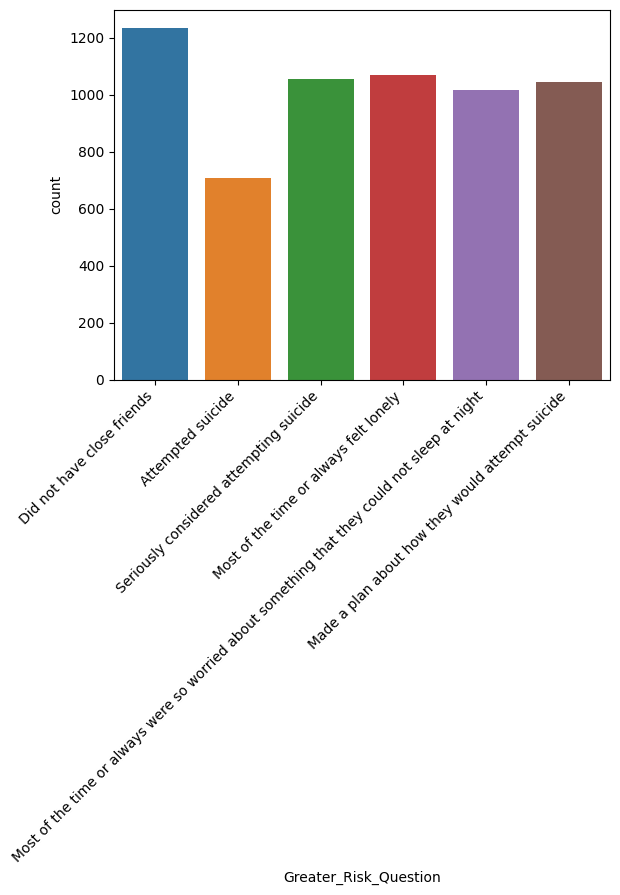

In [ ]:
# Checking for bias in data in terms of different symptoms.
chart = sns.countplot(x='Greater_Risk_Question', data=data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

<ipython-input-54-0b596a26afcf>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


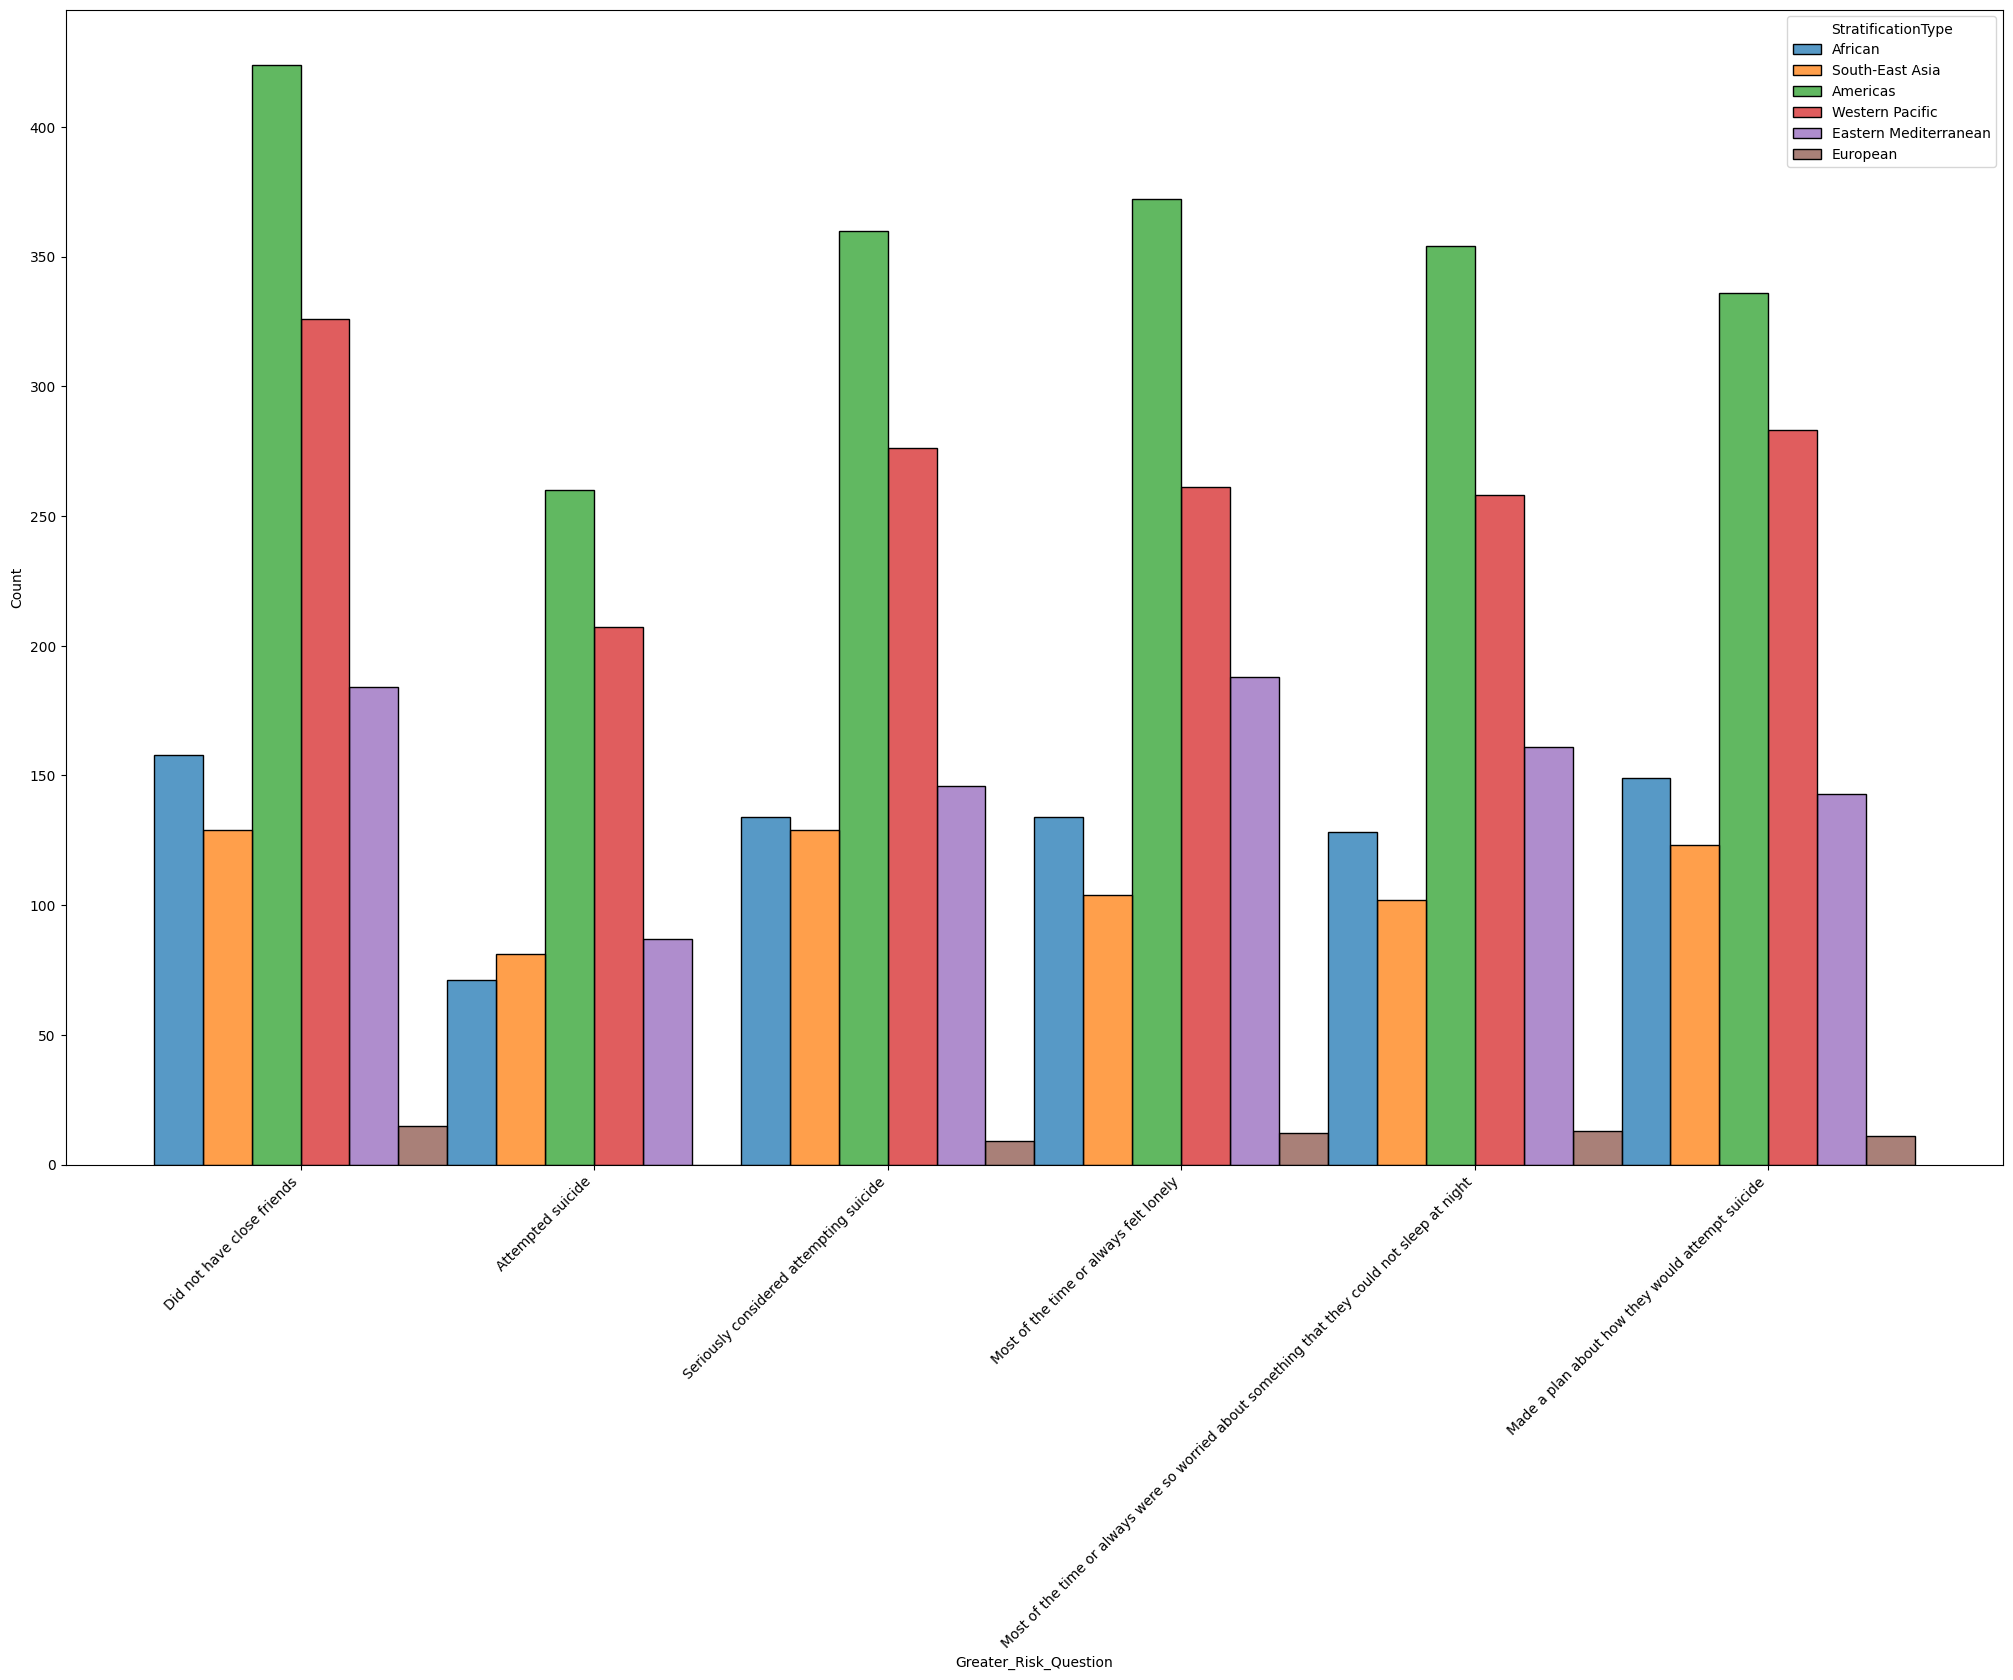

In [ ]:
# Plotting a  histogram between frequency of symptoms in different regions of the world.
fig, ax = plt.subplots(figsize=(25, 15))

chart = sns.histplot(binwidth=1,
            x="Greater_Risk_Question",
            hue="StratificationType",
            data=data,
            stat="count",
            multiple="dodge",
            ax=ax)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [ ]:
category_counts = data['StratificationType'].value_counts()
category_counts

Americas                 2106
Western Pacific          1611
Eastern Mediterranean     909
African                   774
South-East Asia           668
European                   60
Name: StratificationType, dtype: int64

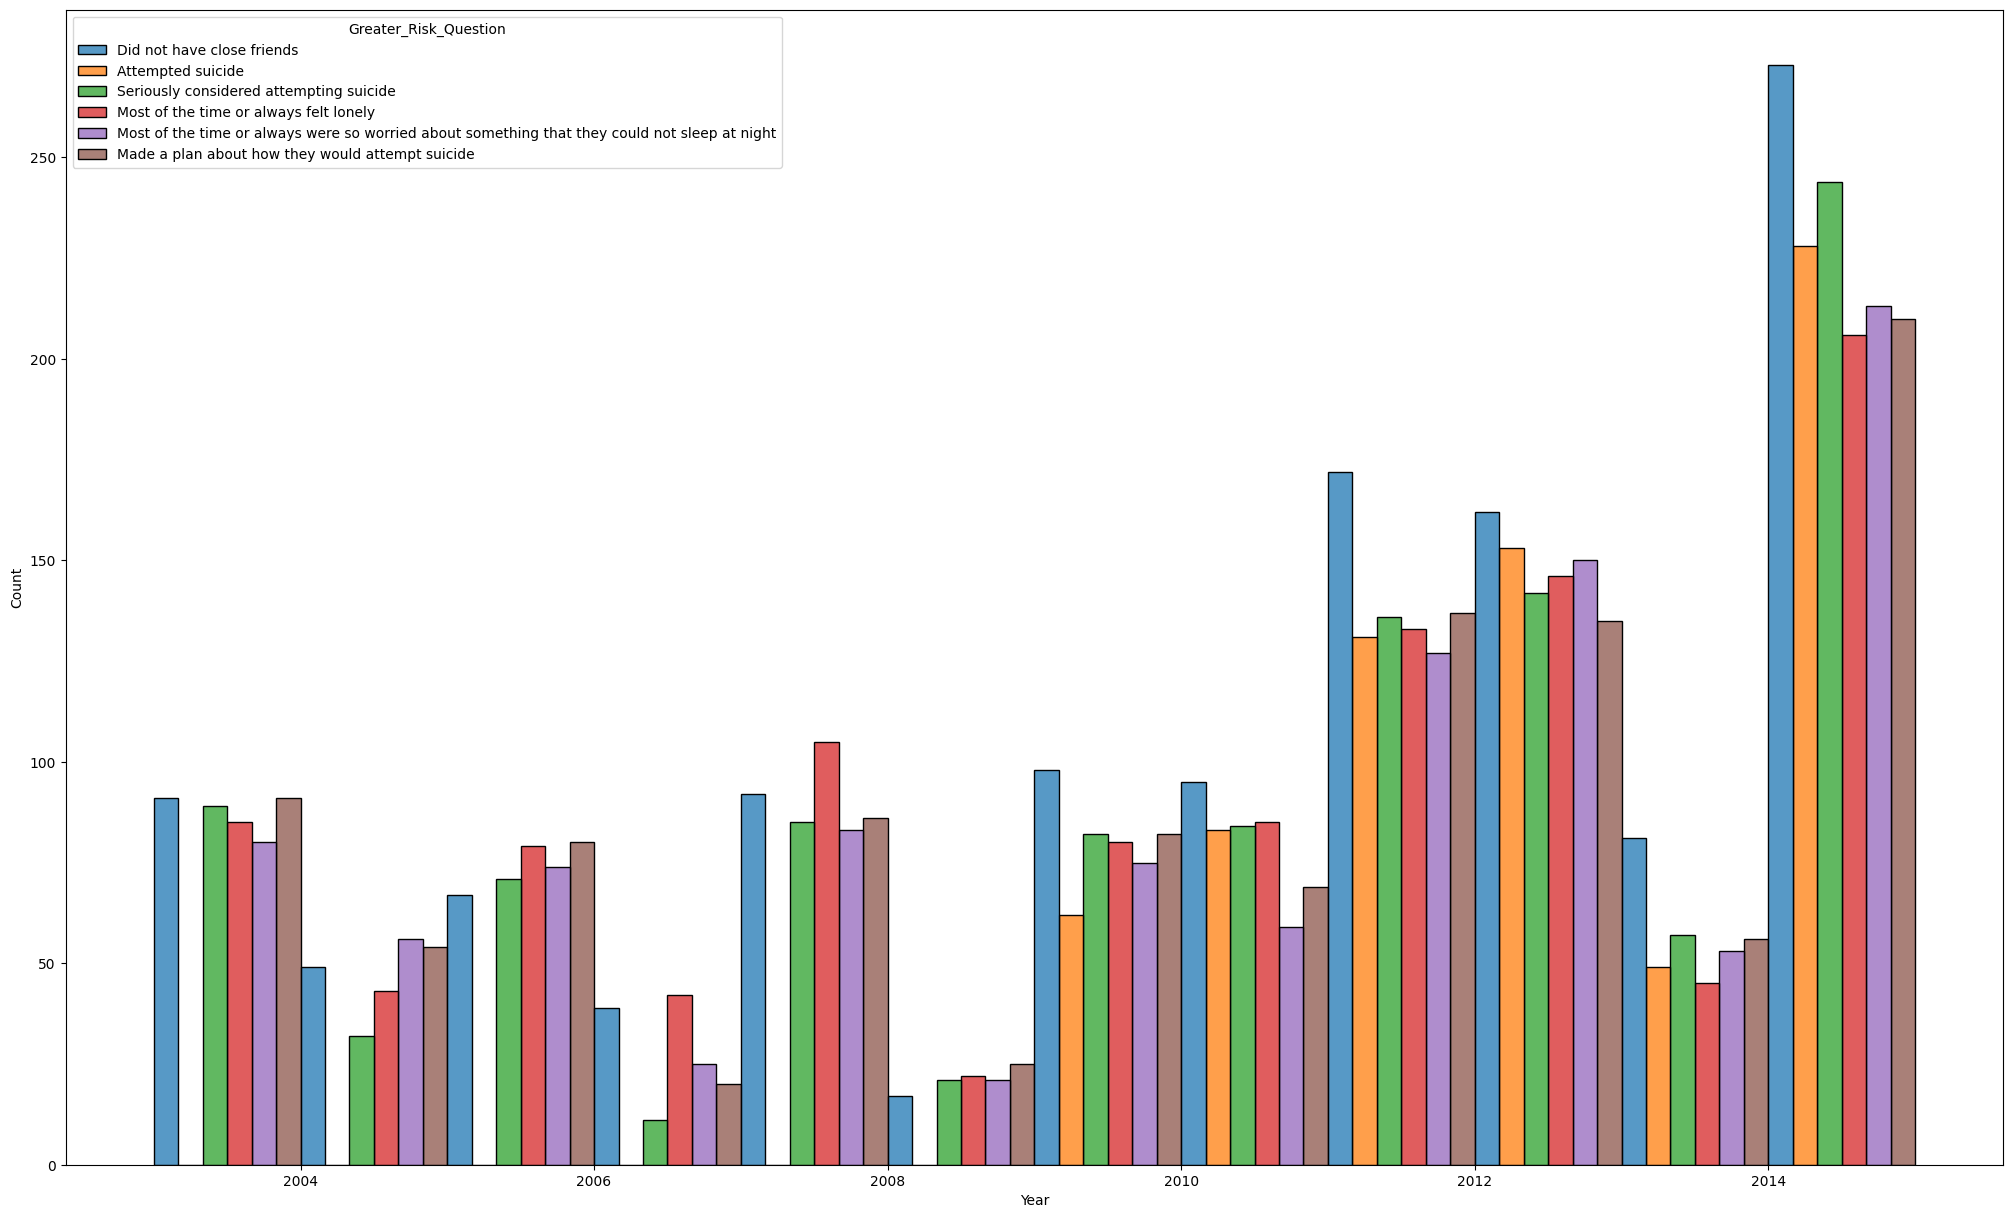

In [ ]:
# Plotting a  histogram between frequency of symptoms with progression in years.

fig, ax = plt.subplots(figsize=(25, 15))

chart = sns.histplot(binwidth=1,
            x="Year",
            hue="Greater_Risk_Question",
            data=data,
            stat="count",
            multiple="dodge",
            ax=ax)
plt.show()

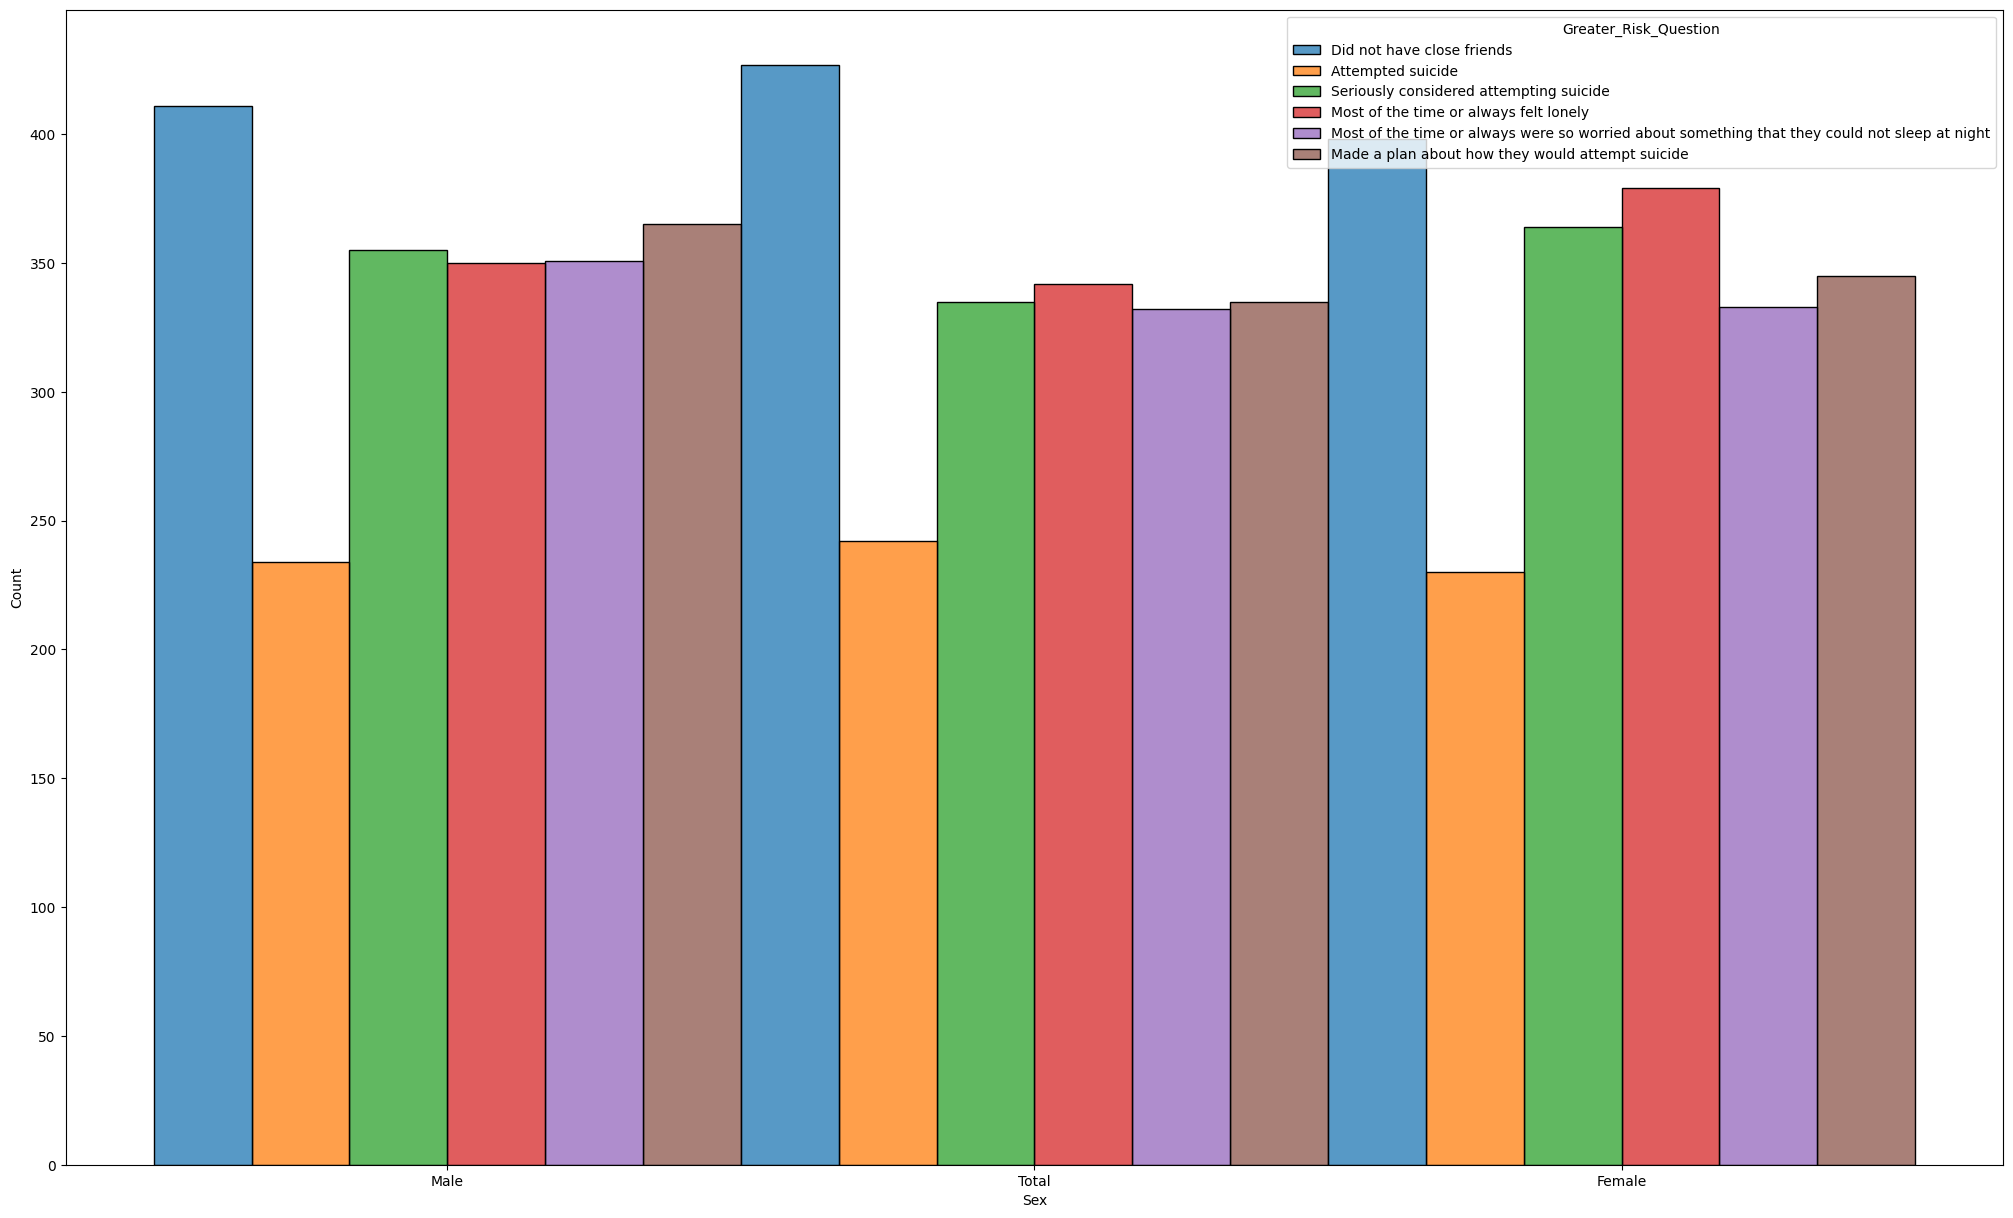

In [ ]:
#Analyzing the prevalence of symptoms across genders.
fig, ax = plt.subplots(figsize=(25, 15))

chart = sns.histplot(binwidth=1,
            x="Sex",
            hue="Greater_Risk_Question",
            data=data,
            stat="count",
            multiple="dodge",
            ax=ax)
plt.show()